<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты,  будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание
* [Шаг 1. Откройте файл с данными и изучите общую информацию.](#open_file)
  * [Анализ входных данных](#open_file.analysis)
  * [Вывод](#open_file.conclusion)
* [Шаг 2. Предобработка данных](#data_preprocessing)
  * [Переименование столбцов](#data_preprocessing.rename)
  * [Аномалии в данных](#data_preprocessing.anomalies)
    * [rooms_count](#data_preprocessing.anomalies.rooms_count)
  * [Избавление от дубликатов в данных](#data_preprocessing.duplicates)
    * [locality_name](#data_preprocessing.duplicates.locality_name)
  * [Обработка пропусков в данных](#data_preprocessing.missing)
    * [locality_name](#data_preprocessing.missing.locality_name)
    * [is_apartment](#data_preprocessing.missing.is_apartment)
    * [balcony_count](#data_preprocessing.missing.balcony_count)
    * [ceiling_height_m](#data_preprocessing.missing.ceiling_height_m)
    * [floors_count](#data_preprocessing.missing.floors_count)
    * [living_area_m2](#data_preprocessing.missing.living_area_m2)
    * [kitchen_area_m2](#data_preprocessing.missing.kitchen_area_m2)
    * [parks_around_3000m_count](#data_preprocessing.missing.parks_around_3000m_count)
    * [ponds_around_3000m_count](#data_preprocessing.missing.ponds_around_3000m_count)
    * [Вывод](#data_preprocessing.missing.conclusion)
  * [Изменение типов данных](#data_preprocessing.change_types)
    * [last_price_rub](#data_preprocessing.change_types.last_price_rub)
    * [creation_date](#data_preprocessing.change_types.creation_date)
    * [floors_count](#data_preprocessing.change_types.floors_count)
    * [is_apartment](#data_preprocessing.change_types.is_apartment)
    * [balcony_count](#data_preprocessing.change_types.balcony_count)
    * [parks_around_3000m_count](#data_preprocessing.change_types.parks_around_3000m_count)
    * [ponds_around_3000m_count](#data_preprocessing.change_types.ponds_around_3000m_count)
    * [Вывод](#data_preprocessing.change_types.conclusion)
* [Шаг 3. Добавление значений в таблицу](#add_columns)
  * [Цена квадратного метра](#add_columns.price_per_m2) 
  * [День недели, месяц и год публикации](#add_columns.date)
  * [Этаж квартиры: первый, последний, другой](#add_columns.floors)
  * [Отношение жилой к общей площади](#add_columns.living_to_total_area_ratio)
  * [Отношение площади кухни к общей](#add_columns.kitchen_to_total_area_ratio)
* [Шаг 4. Исследовательский анализ данных](#exploratory_data_analysis)
  * [Анализ параметров](#exploratory_data_analysis.base_stats)
    * [Площадь](#exploratory_data_analysis.base_stats.total_area_m2)
    * [Цена](#exploratory_data_analysis.base_stats.last_price_rub)
    * [Число комнат](#exploratory_data_analysis.base_stats.rooms_count)
    * [Высота потолков](#exploratory_data_analysis.base_stats.ceiling_height_m)
  * [Время продажи квартиры](#exploratory_data_analysis.date)
  * [Избавиться от редких и выбивающихся значений](#exploratory_data_analysis.anomalies)
  * [Выделение факторов, которые больше всего влияют на стоимость квартиры](#exploratory_data_analysis.corr)
    * [Площадь](#exploratory_data_analysis.corr.total_area_m2)
    * [Число комнат](#exploratory_data_analysis.corr.rooms_count)
    * [Удаленность от центра](#exploratory_data_analysis.corr.nearest_city_center_distance_m)
    * [Этаж](#exploratory_data_analysis.corr.floor)
    * [Дата размещения](#exploratory_data_analysis.corr.creation_date)
  * [Анализ населенных пунктов](#exploratory_data_analysis.localities)
  * [Зависимость цены от расстояния до центра](#exploratory_data_analysis.localities)
  * [Анализ квартир в центре](#exploratory_data_analysis.center)
    * [Площадь](#exploratory_data_analysis.center.total_area_m2)
    * [Цена](#exploratory_data_analysis.center.last_price_rub)
    * [Число комнат](#exploratory_data_analysis.center.rooms_count)
    * [Высота потолков](#exploratory_data_analysis.center.ceiling_height_m)
    * [Выделение факторов, которые больше всего влияют на стоимость квартиры](#exploratory_data_analysis.center.corr)
* [Шаг 5. Общий вывод](#general_conclusion)

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Хорошо бы также привести и описание исходных данных. 

</div>

<a name="open_file"></a>
## Шаг 1. Откройте файл с данными и изучите общую информацию. 

<a name="open_file.analysis"></a>
### Анализ входных данных

Сначала откроем файл и посмотрим на его содержимое

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

real_estate_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

real_estate_df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видим, что можно переименовать столбцы, чтобы они лучше отражали смысл и размерность данных, а также убрать проблемы с регистром (большая буква в `cityCenters_nearest`).

Выведем имена столбцов:

In [2]:
real_estate_df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Будем переименовыввать стобцы таким образом:
* `total_images` -> `images_count`
* `total_area` -> `total_area_m2`
* `first_day_exposition` -> `creation_date`
* `rooms` -> `rooms_count`
* `ceiling_height` -> `ceiling_height_m`
* `living_area` -> `living_area_m2`
* `studio` -> `is_studio`
* `open_plan` -> `is_open_plan`
* `kitchen_area` -> `kitchen_area_m2`
* `balcony` -> `balcony_count`
* `airports_nearest` -> `nearest_airport_distance_m`
* `cityCenters_nearest` -> `nearest_city_center_distance_m`
* `parks_around3000` -> `parks_around_3000m`
* `parks_nearest` -> `nearest_park_distance_m`
* `ponds_around3000` -> `ponds_around_3000m`
* `ponds_nearest` -> `nearest_pond_distance_m`

Ранее можно было обратить внимание, что в выводе видно много пропущенных данных (*NaN*).
Посмотрим на пропуски и типы данных в столбцах:

In [3]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Видно, что есть пропуски во многих строках и у некоторых строк неверные типы.
Разберем, как можно заменить типы данных на более пододящие: 
* `last_price` -> *int*, можно отбросить десятичную часть, уитываю стоимости квартир она не будет ни на что влиять. 
* `first_day_exposition` -> *datetime*, потому что это дата
* `floors_total` -> *int*, потому что не может быть нецелого числа этажей 
* `is_apartment` -> *bool*, потому что из описания видно, что это логический признак
* `balcony` -> *int*, поскольку не может быть нецелого количества балконов 
* `parks_around3000` и `ponds_around3000` -> *int*, потому что в этих столбцах находится количество парков и прудов, а это целые числа 
* `cityCenters_nearest`, `parks_nearest` и `ponds_nearest`  -> *int*, потому что расстояние указано в метрах, можно отбросить десятичную часть

Теперь посмотрим на строки с пропусками и попробуем предположить, почему в них есть пропуски. Выведем столбцы, отсортированные по количеству *NaN* в них:

In [4]:
real_estate_df.isnull().sum().sort_values(ascending=False) / real_estate_df.shape[0] * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
ponds_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

Предположим, почему в некоторых столбцах такое большое количество пропусков: 
* `is_apartment` - скорее всего значит, что значение *False*, потому что люди, которые выставляли не апартаменты не знают, что это такое. И наоброт, владельцы апартаментов скорее всего разбираются в том, что из себя представляет этот тип недвижимости.
* `parks_nearest`, `ponds_nearest` - скорее всего данных нет в системе, и поскольку нет никакого способа адекватно заменить пропуски, то ничего с ними делать не будем.
* `balcony` - скорее всего означает, что балкона у квартиры нет.
* `ceiling_height` - скорее всего владельцы сами не зполнили эти значения, можно например заменить на медиану по населенному пункту или по удалению от центра.
* `airports_nearest`, `cityCenters_nearest` - то же самое, что с `parks_nearest`, `ponds_nearest`, данных нет в системе. 
* `parks_around3000`, `ponds_around3000` - либо парков нет, либо владелец квартиры посчитал не нужным указывать его наличие, надо будет проверить нет ли объектов, ближе, чем 3 км, но не указанных в этих столбцах.
* `days_exposition` - видимо это означает, что объявление еще показывается, т.е либо покупатель не был найдет или сделка не была закрыта в системе. Не понятно, как заменить пропуски в этом столбце, поэтому ничего с ним делать не будем.
* `kitchen_area`, `living_area` - видимо владельцы забыли указать эти данные, их можно вычислить, сгруппировав по кол-ву комнат и населенному пункту. Также возможно, что эти значения пропущенны у апартаментов и квартир с открытой планировкой.
* `locality_name` - поскольку непонятно, как пользователи будут искать квартиры без указания города, где они сдаются и таких квартир не очень много, то скорее всего можно просто удалить такие строки.

В конце выведем общую информацию о данных:

In [5]:
real_estate_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных видно несколко аномалий: 
* *max* и *min* в `rooms`: возможно 19 комнатная квартира это не жилая площадь, надо будет посмотреть, как ограничить квартиры по количеству комнат при исследовании. Надо будет разобраться, что значит квартира с 0 комнатами, возможно это студии или открытые планировки. 
* *max* в `ceiling_height`: 100 метровые потолки - это тоже аномалия, которую надо будет исключить из расчетов
* *max* в `floors_total`: 60 этажный дом - слишком высокий 
* *min* в `living_area`: 2m<sup>2</sup> жилой площади - кажется слишком мало
* *max* в `days_exposition`: 4.3 года - слишком долго для объявления 

<a name="open_file.conclusion"></a>
### Вывод

В данных были обнаружены следующие проблемы:  
1) Недостаточно подробные названия столбцов  
2) Проблема с регистром в имени столбца `cityCenters_nearest`  
3) Неверные типы данных для некоторых стобцов  
4) Много пропусков в данных   
5) Аномальные выбросы в данных  
  
Попробуем их решить.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Первый взгляд на данные выполнен. Здорово, что ты подумал над причинами пропусков. Давай приступим к их обработке. 
    
</div>

<a name="data_preprocessing"></a>
## Шаг 2. Предобработка данных

Сначала переименуем столбцы так, как было указано выше

<a name="data_preprocessing.rename"></a>
### Переименование столбцов

In [6]:
old_column_names = real_estate_df.columns.tolist()
new_column_names = {
    'total_images': 'images_count',
    'last_price': 'last_price_rub',
    'total_area': 'total_area_m2',
    'first_day_exposition': 'creation_date',
    'rooms': 'rooms_count',
    'ceiling_height': 'ceiling_height_m',
    'floors_total': 'floors_count',
    'living_area': 'living_area_m2',
    'studio': 'is_studio',
    'open_plan': 'is_open_plan',
    'kitchen_area': 'kitchen_area_m2',
    'balcony': 'balcony_count',
    'airports_nearest': 'nearest_airport_distance_m',
    'cityCenters_nearest': 'nearest_city_center_distance_m',
    'parks_around3000': 'parks_around_3000m_count',
    'parks_nearest': 'nearest_park_distance_m',
    'ponds_around3000': 'ponds_around_3000m_count',
    'ponds_nearest': 'nearest_pond_distance_m',
}
real_estate_df = real_estate_df.rename(columns=new_column_names)
print('Столбцы, которые поменяли свои названия: ')
for idx, column_name in enumerate(old_column_names):
    new_column_name = new_column_names.get(column_name)
    if new_column_name and column_name != new_column_name: 
        print('{} -> {}'.format(column_name, new_column_name))

real_estate_df.columns.tolist()

Столбцы, которые поменяли свои названия: 
total_images -> images_count
last_price -> last_price_rub
total_area -> total_area_m2
first_day_exposition -> creation_date
rooms -> rooms_count
ceiling_height -> ceiling_height_m
floors_total -> floors_count
living_area -> living_area_m2
studio -> is_studio
open_plan -> is_open_plan
kitchen_area -> kitchen_area_m2
balcony -> balcony_count
airports_nearest -> nearest_airport_distance_m
cityCenters_nearest -> nearest_city_center_distance_m
parks_around3000 -> parks_around_3000m_count
parks_nearest -> nearest_park_distance_m
ponds_around3000 -> ponds_around_3000m_count
ponds_nearest -> nearest_pond_distance_m


['images_count',
 'last_price_rub',
 'total_area_m2',
 'creation_date',
 'rooms_count',
 'ceiling_height_m',
 'floors_count',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'balcony_count',
 'locality_name',
 'nearest_airport_distance_m',
 'nearest_city_center_distance_m',
 'parks_around_3000m_count',
 'nearest_park_distance_m',
 'ponds_around_3000m_count',
 'nearest_pond_distance_m',
 'days_exposition']

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Не надо переименовывать столбцы через атрибут columns, потому что так ты неявно учитываешь порядок столбцов. Если порядок столбцов поменяется, код перестанет работать. Используй вместо этого метод rename().
    
</div>

<div class="alert alert-info">

Поменял на replace()
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Только на rename) В остальном все верно. 

</div>

<a name="data_preprocessing.anomalies"></a>
### Аномалии в данных

<a name="data_preprocessing.anomalies.rooms_count"></a>
#### rooms_count

Выведем строки с 0 в столбце `rooms_count` 

In [7]:
real_estate_df[real_estate_df['rooms_count'] == 0].head(5)

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


Можно заметить, что а этом случае стоит *True* либо в стобце `is_studio` или`is_open_plan`.
Проверим, верно ли это для всех строк.

In [8]:
real_estate_df.query('rooms_count == 0 and not (is_studio or is_open_plan)').shape[0]

0

Из этого можно сделать вывод, что 0 комнат только у студий и квартир со свободной планировкой

<a name="data_preprocessing.duplicates"></a>
### Избавление от дубликатов в данных

<a name="data_preprocessing.duplicates.locality_name"></a>
#### locality_name

Посмотрим сколько уникальных значений в столбце `locality_name`

In [9]:
real_estate_df['locality_name'].nunique() 

364

Попробуем привести все названия населенных пунктов к одному регистру и удалим строки в начале и конце.

In [10]:
real_estate_df['locality_name'] = real_estate_df['locality_name'].str.lower()
real_estate_df['locality_name'] = real_estate_df['locality_name'].str.strip()
real_estate_df['locality_name'].nunique() 

364

Не помогло, посмотрим на названия, чтобы увидеть там какие-то проблемы

In [11]:
real_estate_df['locality_name'].dropna().unique().tolist()

['санкт-петербург',
 'посёлок шушары',
 'городской посёлок янино-1',
 'посёлок парголово',
 'посёлок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'поселок мурино',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'посёлок металлострой',
 'посёлок городского типа лебяжье',
 'посёлок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'посёлок аннино',
 'поселок городского типа ефимовский',
 'посёлок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'посёлок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'посёлок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 '

Можно заметить, что в некоторых словах есть буквы е и ё на одних и тех же местах.
Заменим все ё на е

In [12]:
real_estate_df['locality_name'] = real_estate_df['locality_name'].str.replace('ё', 'е', regex=False)
real_estate_df['locality_name'].nunique() 

330

Отлично, мы смогли избавиться от 34 дубликатов.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Круто, что ты заметил данную помарку в данных. Так результаты будут точнее. 
    
</div>

<a name="data_preprocessing.missing"></a>
### Обработка пропусков в данных

Будем по очереди заменять пропуски в столбцах в соответствии с нашими предположениями.  
Определим функцию, которая будет выводить количество пустых значений в столбце.

In [13]:
def print_nan_count(df, column_name):
    print('Количество пропусков в столбце {}: {}'.format(column_name, df[column_name].isnull().sum()))

Также определим функцию, которая будет показывать, сколько % пропусков в переданном стоблце 

In [14]:
def print_nan_percent(df, column_name):
    print('Процент данных с пропускамив столбце {}: {:.2%}'.format(column_name, df[column_name].isnull().sum() / real_estate_df.shape[0]))

<a name="data_preprocessing.missing.locality_name"></a>
#### locality_name

Посмотрим сколько у нас пропусков в столбце `locality_name`

In [15]:
print_nan_percent(real_estate_df, 'locality_name')

Процент данных с пропускамив столбце locality_name: 0.21%


Всего 0.2%, видимо придется избавиться от этих строк, потому что непонятно, как пользователи будут искать квартиры без указания города, в котором они сдаются.

In [16]:
real_estate_df = real_estate_df.dropna(subset=['locality_name'])
print_nan_count(real_estate_df, 'locality_name')

Количество пропусков в столбце locality_name: 0


<a name="data_preprocessing.missing.is_apartment"></a>
#### is_apartment

Посмотрим сколько пропусков с столбце `is_apartment`

In [17]:
print_nan_percent(real_estate_df, 'is_apartment')

Процент данных с пропускамив столбце is_apartment: 88.33%


В соответсвии с нашим предположением пропуски в `is_apartment` означают то, что недвижимость не является апартаментами, потому что владельцы недвижимости не знают что это такое.  
Поэтому заменим пропуски на *False*

In [18]:
real_estate_df['is_apartment'] = real_estate_df['is_apartment'].fillna(False)
display(real_estate_df['is_apartment'].value_counts())
print_nan_count(real_estate_df, 'is_apartment')

False    23600
True        50
Name: is_apartment, dtype: int64

Количество пропусков в столбце is_apartment: 0


<a name="data_preprocessing.missing.balcony_count"></a>
#### balcony_count

Посмотрим сколько всего пропусков в столбце `balcony_count`

In [19]:
print_nan_percent(real_estate_df, 'balcony_count')

Процент данных с пропускамив столбце balcony_count: 48.68%


Посмотрим средение значения в столбце `balcony_count` сгруппированые по значениям из `rooms_count`

In [20]:
real_estate_df.pivot_table(index='rooms_count', values='balcony_count')

,balcony_count
rooms_count,
0,1.579365
1,1.097937
2,1.108817
3,1.310204
4,1.072658
5,0.956835
6,0.675676
7,0.925926
8,0.000000


В среднем у квартиры есть хотя бы один балкон, что похоже на правду.
Посмотрм, что произойдет, если мы заменим все пропуски на 0.

In [21]:
real_estate_df.fillna(0).pivot_table(index='rooms_count', values='balcony_count')

,balcony_count
rooms_count,
0,1.010152
1,0.576157
2,0.576098
3,0.664482
4,0.477447
5,0.407975
6,0.238095
7,0.423729
8,0.000000


Видно, что среднее значение кол-ва балконов заметно уменьшится.   
Видимо наше предположение о том, что пропуск в `balcony_count` означает, что балкона нет неверно. 
Возможно этих данных нет в системе или владельцы не заполнили их количество по какой-то еще причине.
Заменим пропуски в количестве балконов средним количеством, полученным путем группировки квартир по количеству комнат.

In [22]:
real_estate_df['balcony_count'] = real_estate_df.groupby('rooms_count')['balcony_count'].apply(lambda x: x.fillna(x.mean()))
display(real_estate_df.pivot_table(index='rooms_count', values='balcony_count'))
print_nan_count(real_estate_df, 'balcony_count')

,balcony_count
rooms_count,
0,1.579365
1,1.097937
2,1.108817
3,1.310204
4,1.072658
5,0.956835
6,0.675676
7,0.925926
8,0.000000


Количество пропусков в столбце balcony_count: 5


Осталось 5 пустых значений, посмотрим на них

In [23]:
real_estate_df[real_estate_df['balcony_count'].isnull()]

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,False,False,False,13.3,NaN,санкт-петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,False,False,False,100.0,NaN,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,False,False,False,11.9,NaN,санкт-петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,False,False,False,27.6,NaN,санкт-петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,False,False,False,112.0,NaN,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Видно, что пропуски остались у квартир с очень большим количеством комнат.
Мы врядли будем учитывать их в нашем анализе, заменим пропуски на 0.

In [24]:
real_estate_df['balcony_count'] = real_estate_df['balcony_count'].fillna(0)
print_nan_count(real_estate_df, 'balcony_count')

Количество пропусков в столбце balcony_count: 0


<a name="data_preprocessing.missing.ceiling_height_m"></a>
#### ceiling_height_m

Посмотрим сколько всего пропусков в столбце `ceiling_height_m`

In [25]:
print_nan_percent(real_estate_df, 'ceiling_height_m')

Процент данных с пропускамив столбце ceiling_height_m: 38.73%


<div class="alert alert-info">

Предположим, что высота потолков зависит от удаленности от центра города. Введем новую категорию - расстояние до центра.  
Согласно [википедии](https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0#%D0%93%D0%B5%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5) радиус Санкт-Петербурга - 16 км, соответсвенно введем 3 категории:
* центр (до 8 км)
* город (8 - 16 км)
* область (> 16 км)
    
<div>

In [26]:
def center_category(row):
    if pd.notna(row['nearest_city_center_distance_m']):
        if row['nearest_city_center_distance_m'] <= 8000:
            return 'центр'
        if row['nearest_city_center_distance_m'] <= 16000:
            return 'город'
        return 'область'
    
    if row['locality_name'] == 'санкт-петербург':
        return 'город'
    return 'область'

real_estate_df['city_center_category'] = real_estate_df.apply(center_category, axis=1)

In [27]:
print_nan_percent(real_estate_df, 'city_center_category')

Процент данных с пропускамив столбце city_center_category: 0.00%


Выведем высоты потолков, сгруппированные по `city_center_category`

In [28]:
real_estate_df.pivot_table(index='city_center_category', values='ceiling_height_m')

,ceiling_height_m
city_center_category,
город,2.722540
область,2.686796
центр,3.102546


Замечаем, что чем ближе к центру, тем выше потолки.
Заменим пропуски в высотах потолков на медианы по категории удаленности от цента. 

In [29]:
real_estate_df['ceiling_height_m'] = real_estate_df.groupby('city_center_category')['ceiling_height_m'].apply(lambda x: x.fillna(x.median()))
print_nan_count(real_estate_df, 'ceiling_height_m')

Количество пропусков в столбце ceiling_height_m: 0


<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Подумай, на основании какого параметра будет лучше обработать данный столбец. Строительство, в основном, типовое, поэтому одинаковые дома обладают схожими характеристиками. Будет ли зависеть высота потолков от названия населенного пункта?

</div>

<div class="alert alert-info">

Пересчитал высоти потолков в зависимости от удаленности от центра
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

В принципе, мы можем использовать такой способ. Но удаленность от центра будет слабо влиять на высоты потолков, т.к. строительство, в основном, типовое. Поэтому заполнение на основании параметра высоты потолков будет предпочтительнее. 

</div>

<a name="data_preprocessing.missing.floors_count"></a>
#### floors_count

Сгруппируем значения `floors_count` по населенным пунктам и заменим пропуски на них.

In [30]:
real_estate_df['floors_count'] = real_estate_df.groupby('locality_name')['floors_count'].apply(lambda x: x.fillna(x.mean()))
print_nan_count(real_estate_df, 'floors_count')

Количество пропусков в столбце floors_count: 0


<a name="data_preprocessing.missing.living_area_m2"></a>
#### living_area_m2

Посмотрим, сколько пропусков в `living_area_m2` и `total_area_m2`

In [31]:
print_nan_percent(real_estate_df, 'living_area_m2')
print_nan_count(real_estate_df, 'total_area_m2')

Процент данных с пропускамив столбце living_area_m2: 8.03%
Количество пропусков в столбце total_area_m2: 0


Значит можно будет получить значение жилой площади вычислив его из общей.
Сначала добавим столбец `living_to_total_area_ratio`, поделив значения из столбца `living_area_m2` на `total_area_m2`. 

In [32]:
real_estate_df['living_to_total_area_ratio'] = real_estate_df['living_area_m2'] / real_estate_df['total_area_m2']
display(real_estate_df.head(5))
print_nan_count(real_estate_df, 'living_to_total_area_ratio')

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,1.310204,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,False,False,False,11.0,2.000000,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,False,False,False,8.3,0.000000,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,NaN,9,False,False,False,NaN,0.000000,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,центр,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,1.108817,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,0.320000


Количество пропусков в столбце living_to_total_area_ratio: 1898


Теперь можно сгруппировать значения `living_to_total_area_ratio` по кол-ву комнат, найти среднее и заменить пропуски на него.

In [33]:
real_estate_df['living_to_total_area_ratio'] = real_estate_df.groupby('rooms_count')['living_to_total_area_ratio'].apply(lambda x: x.fillna(x.mean()))
display(real_estate_df.pivot_table(index='rooms_count', values='living_to_total_area_ratio'))
print_nan_count(real_estate_df, 'living_to_total_area_ratio')

,living_to_total_area_ratio
rooms_count,
0,0.685467
1,0.485962
2,0.579358
3,0.625280
4,0.646667
5,0.641377
6,0.668819
7,0.657981
8,0.667001


Количество пропусков в столбце living_to_total_area_ratio: 0


Вычислим значения `living_area_m2` для строк в которых есть пропуски: `living_to_total_area_ratio` * `total_area_m2`

In [34]:
real_estate_df['living_area_m2'] = real_estate_df['living_area_m2'].fillna(
    real_estate_df['total_area_m2'] * real_estate_df['living_to_total_area_ratio']
)
real_estate_df.head(5)

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.0,1.310204,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.600000,1,False,False,False,11.0,2.000000,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.300000,4,False,False,False,8.3,0.000000,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,99.419454,9,False,False,False,NaN,0.000000,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,центр,0.625280
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.0,1.108817,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,0.320000


In [35]:
print_nan_count(real_estate_df, 'living_area_m2')

Количество пропусков в столбце living_area_m2: 0


<a name="data_preprocessing.missing.kitchen_area_m2"></a>
#### kitchen_area_m2

 Проверим пропуски в `kitchen_area_m2`

In [36]:
print_nan_percent(real_estate_df, 'kitchen_area_m2')

Процент данных с пропускамив столбце kitchen_area_m2: 9.59%


По той же логике, что и для `living_area_m2` добавим столбец `kitchen_to_total_area_ratio`: поделим значения из `kitchen_area_m2` на `total_area_m2`. 

In [37]:
real_estate_df['kitchen_to_total_area_ratio'] = real_estate_df['kitchen_area_m2'] / real_estate_df['total_area_m2']
display(real_estate_df.head(5))
print_nan_count(real_estate_df, 'kitchen_to_total_area_ratio')

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.0,1.310204,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.600000,1,False,False,False,11.0,2.000000,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.300000,4,False,False,False,8.3,0.000000,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,99.419454,9,False,False,False,NaN,0.000000,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,центр,0.625280,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.0,1.108817,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,0.320000,0.410000


Количество пропусков в столбце kitchen_to_total_area_ratio: 2269


Теперь заполним значения `kitchen_to_total_area_ratio` там, где они отсутствуют

In [38]:
real_estate_df['kitchen_to_total_area_ratio'] = real_estate_df.groupby('rooms_count')['kitchen_to_total_area_ratio'].apply(lambda x: x.fillna(x.mean()))
display(real_estate_df.pivot_table(index='rooms_count', values='kitchen_to_total_area_ratio'))
print_nan_count(real_estate_df, 'kitchen_to_total_area_ratio')

,kitchen_to_total_area_ratio
rooms_count,
1,0.249899
2,0.174138
3,0.140924
4,0.124006
5,0.113455
6,0.104150
7,0.091932
8,0.091708
9,0.075054


Количество пропусков в столбце kitchen_to_total_area_ratio: 197


У нас остались пропуски в `kitchen_to_total_area_ratio`, посмотрим на эти строки. 

In [39]:
real_estate_df[real_estate_df['kitchen_to_total_area_ratio'].isnull()].head() 

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio,kitchen_to_total_area_ratio
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.6,24.0,15.500000,2,False,True,False,NaN,2.000000,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,область,0.574074,NaN
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.6,14.0,17.000000,1,False,False,True,NaN,0.000000,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,область,0.680000,NaN
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.6,17.0,24.750000,4,False,True,False,NaN,2.000000,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,город,0.912947,NaN
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.6,26.0,24.300000,19,False,False,True,NaN,1.000000,поселок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,область,0.706395,NaN
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.6,10.0,17.136675,7,False,True,False,NaN,1.579365,поселок шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,область,0.685467,NaN


Проверим, что значений kitchen_area_m2 нет только для квартир с количеством комнат равным *0* (т.е студий или квартир со свободной планировкой)

In [40]:
real_estate_df[real_estate_df['kitchen_to_total_area_ratio'].isnull()]['rooms_count'].unique() 

array([0])

В этом случае заменим `kitchen_to_total_area_ratio` на 0, посмольку в этих квартирах нет разграничения между кухней и жилой зоной.

In [41]:
real_estate_df['kitchen_to_total_area_ratio'] = real_estate_df['kitchen_to_total_area_ratio'].fillna(0)
print_nan_count(real_estate_df, 'kitchen_to_total_area_ratio')

Количество пропусков в столбце kitchen_to_total_area_ratio: 0


С пропусками в `kitchen_to_total_area_ratio` разобрались, теперь вычислим значения `kitchen_area_m2`.

In [42]:
def compute_kitchen_area(row):
    if pd.notna(row['kitchen_area_m2']):
        return row['kitchen_area_m2']
    
    return min(row['kitchen_to_total_area_ratio'] * row['total_area_m2'], row['total_area_m2'] - row['living_area_m2'])


real_estate_df['kitchen_area_m2'] = real_estate_df.apply(compute_kitchen_area, axis=1)
display(real_estate_df.head(5))
print_nan_count(real_estate_df, 'kitchen_area_m2')

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio,kitchen_to_total_area_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,1.310204,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.600000,1,False,False,False,11.000000,2.000000,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.300000,4,False,False,False,8.300000,0.000000,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,99.419454,9,False,False,False,22.406883,0.000000,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,центр,0.625280,0.140924
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,1.108817,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,0.320000,0.410000


Количество пропусков в столбце kitchen_area_m2: 0


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Мололец, крутая обработка пропусков. Ты выбрал наиболее коррелирующие параметры для заполнения данных пропусков. Только стоило привести сами коэффициенты корреляции для доказательства выбора. 

</div>

<a name="data_preprocessing.missing.parks_around_3000m_count"></a>
#### parks_around_3000m_count

Посмотрим сколько пропусков в стролбце `parks_around_3000m_count`

In [43]:
print_nan_percent(real_estate_df, 'parks_around_3000m_count')

Процент данных с пропускамив столбце parks_around_3000m_count: 23.30%


Посмотрим, есть ли строки с пропусками, но с парком ближе, чем 3км

In [44]:
real_estate_df.query('parks_around_3000m_count == 0 and nearest_park_distance_m <= 3000').shape[0]

0

Нет, значит можно поставить 0 вместо пропусков

In [45]:
real_estate_df['parks_around_3000m_count'] = real_estate_df['parks_around_3000m_count'].fillna(0)
print_nan_count(real_estate_df, 'parks_around_3000m_count')

Количество пропусков в столбце parks_around_3000m_count: 0


<a name="data_preprocessing.missing.ponds_around_3000m_count"></a>
#### ponds_around_3000m_count

In [46]:
print_nan_percent(real_estate_df, 'ponds_around_3000m_count')

Процент данных с пропускамив столбце ponds_around_3000m_count: 23.30%


Посмотрим, есть ли строки с пропусками, но с прудом ближе, чем 3км

In [47]:
real_estate_df.query('ponds_around_3000m_count == 0 and nearest_pond_distance_m <= 3000').shape[0]

0

Нет, значит можно поставить 0 вместо пропусков

In [48]:
real_estate_df['ponds_around_3000m_count'] = real_estate_df['ponds_around_3000m_count'].fillna(0)
print_nan_count(real_estate_df, 'ponds_around_3000m_count')

Количество пропусков в столбце ponds_around_3000m_count: 0


<a name="data_preprocessing.missing.conclusion"></a>
#### Вывод

Посмотрим, сколько пропусков у нас осталось в таблице.

In [49]:
real_estate_df.isnull().sum().sort_values(ascending=False) / real_estate_df.shape[0] * 100

nearest_park_distance_m           65.902748
nearest_pond_distance_m           61.585624
nearest_airport_distance_m        23.399577
nearest_city_center_distance_m    23.302326
days_exposition                   13.446089
kitchen_to_total_area_ratio        0.000000
is_apartment                       0.000000
last_price_rub                     0.000000
total_area_m2                      0.000000
creation_date                      0.000000
rooms_count                        0.000000
ceiling_height_m                   0.000000
floors_count                       0.000000
living_area_m2                     0.000000
floor                              0.000000
kitchen_area_m2                    0.000000
is_studio                          0.000000
is_open_plan                       0.000000
living_to_total_area_ratio         0.000000
balcony_count                      0.000000
locality_name                      0.000000
parks_around_3000m_count           0.000000
ponds_around_3000m_count        

Пропуски остались только в столбцах, которые заполняются системой и которые нельзя никак заменить на основе других данных.

<a name="data_preprocessing.change_types"></a>
### Изменение типов данных

Выведем типы данных в датафрейме `real_estate_df`

In [50]:
real_estate_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 25 columns):
images_count                      23650 non-null int64
last_price_rub                    23650 non-null float64
total_area_m2                     23650 non-null float64
creation_date                     23650 non-null object
rooms_count                       23650 non-null int64
ceiling_height_m                  23650 non-null float64
floors_count                      23650 non-null float64
living_area_m2                    23650 non-null float64
floor                             23650 non-null int64
is_apartment                      23650 non-null bool
is_studio                         23650 non-null bool
is_open_plan                      23650 non-null bool
kitchen_area_m2                   23650 non-null float64
balcony_count                     23650 non-null float64
locality_name                     23650 non-null object
nearest_airport_distance_m        18116 non-null floa

In [51]:
def convert_type(df, column_name, new_type, errors='raise'):
    df[column_name] = df[column_name].astype(new_type, errors=errors)

<a name="data_preprocessing.change_types.last_price_rub"></a>
#### last_price_rub

In [52]:
convert_type(real_estate_df, 'last_price_rub', 'int')

<a name="data_preprocessing.change_types.creation_date"></a>
#### creation_date

Посмотрим на то, как представлена дата в столбце `creation_date`.

In [53]:
real_estate_df['creation_date'].head(1)

0    2019-03-07T00:00:00
Name: creation_date, dtype: object

Теперь приведем этот столбец к типу *datetime*. 

In [54]:
real_estate_df['creation_date'] = pd.to_datetime(real_estate_df['creation_date'], format='%Y-%m-%dT%H:%M:%S')

<a name="data_preprocessing.change_types.floors_count"></a>
#### floors_count

In [55]:
convert_type(real_estate_df, 'floors_count', 'int')

<a name="data_preprocessing.change_types.is_apartment"></a>
#### is_apartment

In [56]:
convert_type(real_estate_df, 'is_apartment', 'bool')

<a name="data_preprocessing.change_types.balcony_count"></a>
#### balcony_count

In [57]:
convert_type(real_estate_df, 'balcony_count', 'int')

<a name="data_preprocessing.change_types.parks_around_3000m_count"></a>
#### parks_around_3000m_count

In [58]:
convert_type(real_estate_df, 'parks_around_3000m_count', 'int')

<a name="data_preprocessing.change_types.ponds_around_3000m_count"></a>
#### ponds_around_3000m_count

In [59]:
convert_type(real_estate_df, 'ponds_around_3000m_count', 'int')

<a name="data_preprocessing.change_types.conclusion"></a>
#### Вывод

Выведем типы данных после их изменения 

In [60]:
real_estate_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 25 columns):
images_count                      23650 non-null int64
last_price_rub                    23650 non-null int64
total_area_m2                     23650 non-null float64
creation_date                     23650 non-null datetime64[ns]
rooms_count                       23650 non-null int64
ceiling_height_m                  23650 non-null float64
floors_count                      23650 non-null int64
living_area_m2                    23650 non-null float64
floor                             23650 non-null int64
is_apartment                      23650 non-null bool
is_studio                         23650 non-null bool
is_open_plan                      23650 non-null bool
kitchen_area_m2                   23650 non-null float64
balcony_count                     23650 non-null int64
locality_name                     23650 non-null object
nearest_airport_distance_m        18116 non-null fl

К сожалению типы не удастся поменять у следующих столбцов из-за того, что в них есть пропуски в данных: 
* nearest_airport_distance_m
* nearest_city_center_distance_m
* nearest_park_distance_m
* nearest_pond_distance_m

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Пропуски обработаны там, где это возможно. Данные подготовлены к дальнейшему анализу. Типы данных также изменены у необходимых параметров. 

</div>

<a name="add_columns"></a>
## Шаг 3. Добавление значений в таблицу

<a name="add_columns.price_per_m2"></a>
### Цена квадратного метра

Для того, чтобы вычислить стоимость квадратного метра досточно поделить стоимость квартиры на ее площадь.

In [61]:
real_estate_df['price_per_m2'] = real_estate_df['last_price_rub'] / real_estate_df['total_area_m2']
real_estate_df.head(5)

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio,kitchen_to_total_area_ratio,price_per_m2
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,1,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,область,0.472222,0.231481,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.60,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,область,0.460396,0.272277,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,город,0.612500,0.148214,92785.714286
3,0,64900000,159.0,2015-07-24,3,3.00,14,99.419454,9,False,False,False,22.406883,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,центр,0.625280,0.140924,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,1,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,город,0.320000,0.410000,100000.000000


<a name="add_columns.date"></a>
### День недели, месяц и год публикации

Создадим 3 новых столбца со значениями дня недели, месяца и года публикации, полученных из `creation_date`

In [62]:
real_estate_df['creation_date_day'] = real_estate_df['creation_date'].dt.dayofweek
real_estate_df['creation_date_month'] = real_estate_df['creation_date'].dt.month
real_estate_df['creation_date_year'] = real_estate_df['creation_date'].dt.year
real_estate_df.head(5)

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio,kitchen_to_total_area_ratio,price_per_m2,creation_date_day,creation_date_month,creation_date_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,1,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,область,0.472222,0.231481,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.60,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,область,0.460396,0.272277,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,город,0.612500,0.148214,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,3.00,14,99.419454,9,False,False,False,22.406883,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,центр,0.625280,0.140924,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,1,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,город,0.320000,0.410000,100000.000000,1,6,2018


<a name="add_columns.floors"></a>
### Этаж квартиры: первый, последний, другой

Напишем и применим функцию для того, чтобы категоризовать квартиры по тому, на каком этаже они находятся.
Результат запишем в столбец `floor_category`

In [63]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] < row['floors_count']:
        return 'другой'
    else: 
        return 'последний'

real_estate_df['floor_category'] = real_estate_df.apply(floor_category, axis=1)

<div class="alert alert-info">

Для того, чтобы в будущем вычислять корреляции переведем строки в категоральные данные.
Коды для категоральных данных:
* 0 - первый
* 1 - другой
* 2 - последний

</div>

In [64]:
from pandas.api.types import CategoricalDtype

category_type = CategoricalDtype(categories=["первый", "другой", "последний"], ordered=True)

real_estate_df['floor_category']  = real_estate_df['floor_category'].astype(category_type).cat.codes

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Можно использовать просто astype('category'). И уже потом cat.codes. Результат будет идентичным. 

</div>

Проверим, что категории работают верно 

In [65]:
display(
    real_estate_df.query('floor == 1').head(1)['floor_category'], 
    real_estate_df.query('1 < floor < floors_count').head(1)['floor_category'], 
    real_estate_df.query('floor == floors_count').head(1)['floor_category'],
)

1    0
Name: floor_category, dtype: int8

0    1
Name: floor_category, dtype: int8

12    2
Name: floor_category, dtype: int8

<a name="add_columns.living_to_total_area_ratio"></a>
### Отношение жилой площади к общей 

Мы уже [вычислили](#data_preprocessing.missing.living_area_m2) это значение, оно находится в столбце `living_to_total_area_ratio`

<a name="add_columns.kitchen_to_total_area_ratio"></a>
### Отношение площади кухни к общей

Это значение мы тоже [вычислили](#data_preprocessing.missing.kitchen_area_m2) заранее, оно находится в столбце `kitchen_to_total_area_ratio`

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Добавление необходимых для дальнейшего исследования параметров произведено. Спасибо за ссылки и за такой подход к оформлению проекта. 

</div>

<a name="exploratory_data_analysis"></a>
## Шаг 4. Исследовательский анализ данных

<a name="exploratory_data_analysis.base_stats"></a>
### Анализ параметров: площадь, цена, число комнат, высота потолков

Определим класс, который посчитает границы нормальных значений (т.е Q1 - 1.5 * IQR и Q3 + 1.5 * IQR) и затем сможет рисовать hist графики по ним. Также добавим в него методы для вывода общей статистики и рисования boxplot.

In [66]:
class NormalRangeAnalyzer(object):
    MIN_VIEW_BOXPLOT_MUL = 0.8
    MAX_VIEW_BOXPLOT_MUL = 1.2
    
    def __init__(self, series, column_name):
        self._series = series
        self._column_name = column_name
        self._normal_range_min, self._normal_range_max = self._compute_normal_range()
    
    def _compute_normal_range(self):
        min_, q1, q3, max_ = self._series.quantile([0, 0.25, 0.75, 1])
        iqr = q3 - q1
        return max(min_, q1 - 1.5 * iqr), min(max_, q3 + 1.5 * iqr)
    
    def describe(self):
        display(self._series.describe())
        print('Границы нормальных значений для столбца {}: ({:.2f}, {:.2f})'.format(
            self._column_name, 
            self._normal_range_min,
            self._normal_range_max,
        ))
    
    def boxplot(self, range_min=None, range_max=None):
        if range_min is None:
            range_min = self._normal_range_min * self.MIN_VIEW_BOXPLOT_MUL
        if range_max is None:   
            range_max = self._normal_range_max * self.MAX_VIEW_BOXPLOT_MUL
        
        self._series.plot(
            kind='box',
            grid=True,
            ylim=(range_min, range_max),
        )
        plt.show()
    
    def hist(self, normal=False, bins=100, range_min=None, range_max=None):
        if range_min is None:
            range_min = self._normal_range_min
        if range_max is None:   
            range_max = self._normal_range_max
        
        if normal:
            self._series.plot(
                kind='hist', 
                bins=bins, 
                range=(range_min, range_max), 
                title=self._column_name,
                grid=True,
            )
        else:
            self._series.plot(
                kind='hist', 
                bins=bins, 
                title=self._column_name,
                grid=True,
            )
        plt.show()


<a name="exploratory_data_analysis.base_stats.total_area_m2"></a>
#### Площадь

Выведем описание значений в столбце `total_area_m2`  

In [67]:
total_area_m2_analyzer = NormalRangeAnalyzer(real_estate_df['total_area_m2'], 'total_area_m2')
total_area_m2_analyzer.describe() 

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area_m2, dtype: float64

Границы нормальных значений для столбца total_area_m2: (12.00, 114.25)


Теперь посмотрим на диаграмму размаха

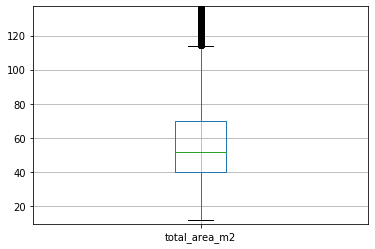

In [68]:
total_area_m2_analyzer.boxplot() 

Грязные данные

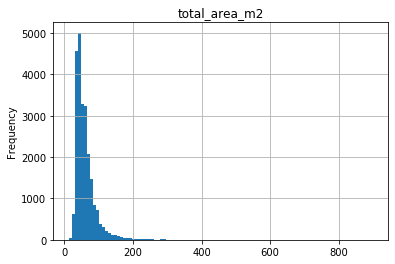

In [69]:
total_area_m2_analyzer.hist() 

Данные без выбросов

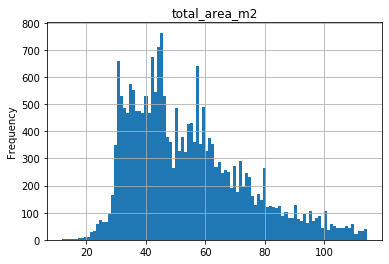

In [70]:
total_area_m2_analyzer.hist(normal=True) 

**Выводы:**
* min площадь квартиры - 12m<sup>2</sup>, max - 900m<sup>2</sup>
* границы нормальных значений - от 12  до 115 m<sup>2</sup>
* средние значения - от 40 до 70 m<sup>2</sup>
* пуассоновское распределение значений

<a name="exploratory_data_analysis.base_stats.last_price_rub "></a>
#### Цена 

Выведем описание значений в столбце `last_price_rub`  

In [71]:
last_price_rub_analyzer = NormalRangeAnalyzer(real_estate_df['last_price_rub'], 'last_price_rub')
last_price_rub_analyzer.describe() 

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price_rub, dtype: float64

Границы нормальных значений для столбца last_price_rub: (12190.00, 11897500.00)


12 т.р за квартиру выглядит, как ошибка. Найдем минимальную границу 

In [72]:
real_estate_df.sort_values('last_price_rub').head(5)

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio,kitchen_to_total_area_ratio,price_per_m2,creation_date_day,creation_date_month,creation_date_year,floor_category
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.000000,25,False,False,False,40.500000,1,санкт-петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,город,0.293578,0.371560,111.834862,2,3,2019,2
17456,7,430000,30.4,2019-04-22,1,2.60,2,16.000000,1,False,False,False,6.000000,1,сланцы,NaN,NaN,0,NaN,0,NaN,NaN,область,0.526316,0.197368,14144.736842,0,4,2019,0
14911,5,430000,54.0,2018-06-26,2,2.60,3,31.285327,3,False,False,False,9.403466,1,поселок станции свирь,NaN,NaN,0,NaN,0,NaN,44.0,область,0.579358,0.174138,7962.962963,1,6,2018,2
16274,18,440000,40.0,2018-07-10,1,2.60,5,19.438477,1,False,False,False,9.995957,1,деревня старополье,NaN,NaN,0,NaN,0,NaN,45.0,область,0.485962,0.249899,11000.000000,1,7,2018,0
17676,0,450000,36.5,2018-02-01,1,2.60,5,17.300000,4,False,False,False,8.500000,1,деревня ям-тесово,NaN,NaN,0,NaN,0,NaN,120.0,область,0.473973,0.232877,12328.767123,3,2,2018,1


Можно остановиться на границе в 430 т.р 

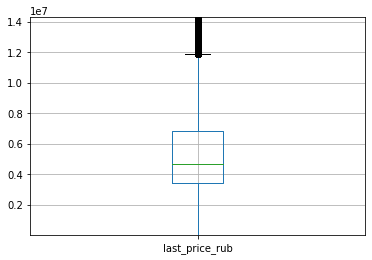

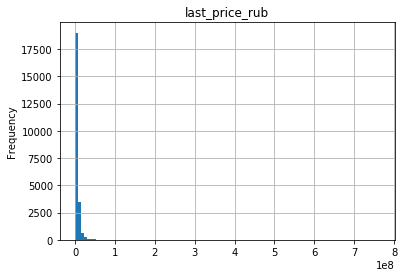

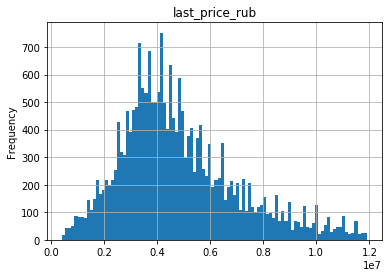

In [73]:
last_price_rub_analyzer.boxplot() 
last_price_rub_analyzer.hist(range_min=430000) 
last_price_rub_analyzer.hist(normal=True, range_min=430000) 

Выведем гистограммы

**Выводы:**
* min стоимость квартиры - 12 т.р., что похоже на ошибку в данных, max - 763 млн.р.
* границы нормальных значений - от 430 т.р. до 11.9 млн.р
* средние значения - от 3.4 млн.р. до 6.8 млн.р

<a name="exploratory_data_analysis.base_stats.rooms_count"></a>
#### Число комнат 

Выведем описание значений в столбце `rooms_count`  

In [74]:
rooms_count_analyser = NormalRangeAnalyzer(real_estate_df['rooms_count'], 'rooms_count')
rooms_count_analyser.describe() 

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_count, dtype: float64

Границы нормальных значений для столбца rooms_count: (0.00, 6.00)


Выведем диаграмму размаха и гистограммы

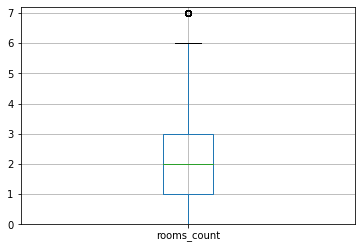

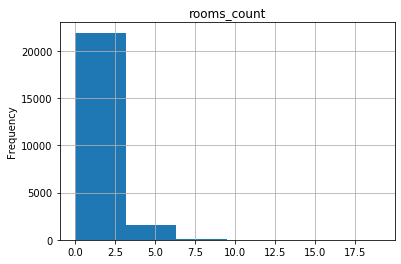

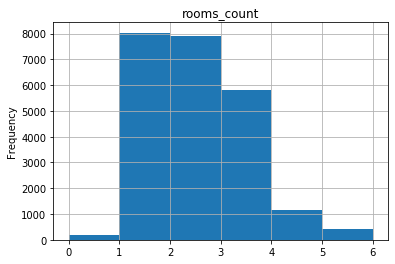

In [75]:
rooms_count_analyser.boxplot()
rooms_count_analyser.hist(bins=6)
rooms_count_analyser.hist(normal=True, bins=6)

**Выводы:**
* min количетсво комнат - 0, мы уже выяснили, что это означает, что квартира студия или с открытой планировкой. max количество комнат - 19.
* границы нормальных значений - от 0 до 6 комнат 
* средние значения - от 1 до 3 комнат

<a name="exploratory_data_analysis.base_stats.ceiling_height_m"></a>
#### Высота потолков

Выведем описание значений в столбце `ceiling_height_m`  

In [76]:
ceiling_height_m_analyser = NormalRangeAnalyzer(real_estate_df['ceiling_height_m'], 'ceiling_height_m')
ceiling_height_m_analyser.describe() 

count    23650.000000
mean         2.727000
std          0.992876
min          1.000000
25%          2.600000
50%          2.600000
75%          2.750000
max        100.000000
Name: ceiling_height_m, dtype: float64

Границы нормальных значений для столбца ceiling_height_m: (2.38, 2.97)


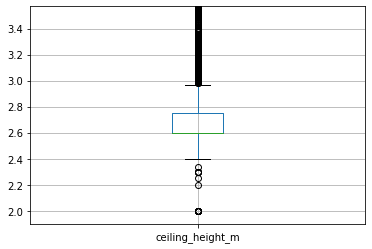

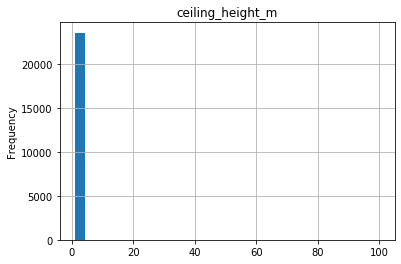

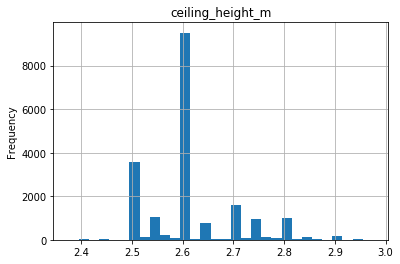

In [77]:
ceiling_height_m_analyser.boxplot()
ceiling_height_m_analyser.hist(bins=30)
ceiling_height_m_analyser.hist(normal=True, bins=30)

**Выводы:**
* min выскота потолка 1 м, а max 100 м. Оба эти значения находятся за границами нормальных значений.
* границы нормальных значений - от 2.3 м до 3.11 м
* средние значения - от 2.6 до 2.8 м
* видно несколько явных пиков, видимо это связано с нормами строительства или типовым жильем

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Опять же крутая реализация, молодец. Очень радует твой подход к анализу) Вся стат. информация дана, все графики приведены, что еще надо!
</div>

<a name="exploratory_data_analysis.date"></a>
### Время продажи квартиры

Выведем описание значений в столбце `ceiling_height_m`  

In [78]:
days_exposition_analyser = NormalRangeAnalyzer(real_estate_df['days_exposition'], 'days_exposition')
days_exposition_analyser.describe() 

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Границы нормальных значений для столбца days_exposition: (1.00, 510.00)


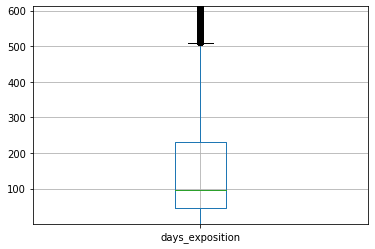

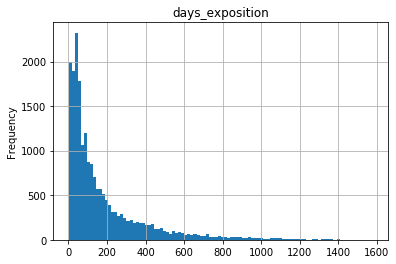

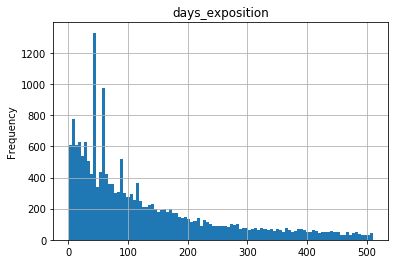

In [79]:
days_exposition_analyser.boxplot()
days_exposition_analyser.hist()
days_exposition_analyser.hist(normal=True)

Посмотрим на каких значениях находятся пики 

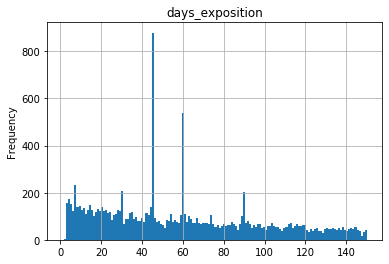

In [80]:
days_exposition_analyser.hist(normal=True, range_max=150, bins=150)

In [81]:
real_estate_df.query('days_exposition < 150').groupby('days_exposition')['days_exposition'].count().sort_values(ascending=False).head(10)

days_exposition
45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
4.0     174
3.0     158
5.0     152
14.0    148
9.0     142
Name: days_exposition, dtype: int64

Видим большие прики на 45 и 60 день - скорее всего либо Яндекс.Недвижимость сама закрывает объявления, либо у риелторов отчет в эти дни и они сами закрывают сделки.   
В любом случае эти выбросы означают автоматизированную обработку объявлений.

**Выводы:**
* min время продажи - один день, а max - 1580 дней
* границы нормальных значений - от 1 м до 510 дней
* средние значения - от 45 до 231 дня
* медиана - 95 дней, среднее значение - 180. Видно большой разброс между средним и медианой, следовательно у данных большой хвост.
* следовательно, нормальное время продажи - 95 дней, быстрое - быстрее, чем за 45 дней, медленно - дольше, чем за 231 день.
* видно несколько явных пиков, связано с автоматизированным закрытием объявлений.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
   
Здорово, что есть гипотезы о быстрых и долгих сделках.

</div>

<a name="exploratory_data_analysis.anomalies"></a>
### Избавиться от редких и выбивающихся значений

Для того, чтобы избавиться от выбивающихся значений используем результаты работы, получаенные на предыдущих шагах.  
Рассмотрим какие значения для границ нормальных значений мы получили:
* `total_area_m2` - (12, 115)
* `last_price_rub` - (430000, 11897500)
* `rooms_count` - (0, 6)
* `ceiling_height_m` - (2.29, 3.11)  
* `days_exposition` - (1, 510)

Возьмем срез по этим значениям

In [82]:
real_estate_df_normal = (
    real_estate_df
    .query('12 <= total_area_m2 <= 115')
    .query('430000 <= last_price_rub <= 11897500')
    .query('0 <= rooms_count <= 6')
    .query('2.29 <= ceiling_height_m <= 3.11')
    .query('1 <= days_exposition <= 510')
)
print('Количетво строк в исходных данных:', real_estate_df.shape[0])
print('Количетво строк в нормальных данных:', real_estate_df_normal.shape[0])

Количетво строк в исходных данных: 23650
Количетво строк в нормальных данных: 16930


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Выбросы из данных удалены. Верно, что ты привел диаграммы размаха для каждого параметра для нахождения границ.  

</div>

<a name="exploratory_data_analysis.corr"></a>
### Выделение факторов, которые больше всего влияют на стоимость квартиры

<a name="exploratory_data_analysis.corr.total_area_m2"></a>
#### Площадь

Выведем график зависимости `total_area_m2` от `last_price_rub` 

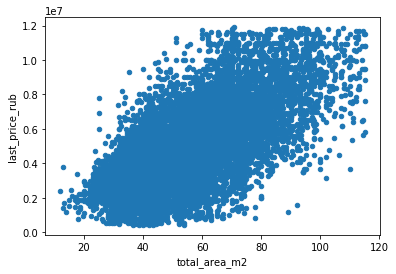

In [83]:
real_estate_df_normal.plot(x='total_area_m2', y='last_price_rub', kind='scatter')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Если уж на то пошло, можем ли мы автоматизировать и данный процесс построения графиков зависимостей?

</div>

Видно, что цена растет в зависимости от слощади.  
Выведем `hexbin` график, чтобы лучше увидеть, что находится сосредоточение точек

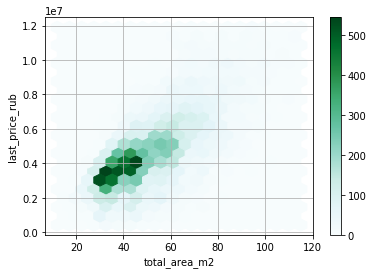

In [84]:
real_estate_df_normal.plot(x='total_area_m2', y='last_price_rub', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.show()

In [85]:
real_estate_df_normal['total_area_m2'].corr(real_estate_df_normal['last_price_rub'])

0.6928460137082693

**Вывод:** Корреляция сильная

<a name="exploratory_data_analysis.corr.rooms_count"></a>
#### Число комнат

Выведем график зависимости `rooms_count` от `last_price_rub` 

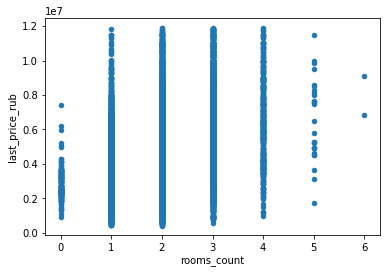

In [86]:
real_estate_df_normal.plot(x='rooms_count', y='last_price_rub', kind='scatter')
plt.show()

In [87]:
real_estate_df_normal['rooms_count'].corr(real_estate_df_normal['last_price_rub'])

0.42910212671565734

**Вывод:** Корреляция слабая, судя по графику 4000000 может стоить любая квартира, начиная со студии и заканчивая 4-х комнатной

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Хорошо бы построить график по средним ценам в зависимости от числа комнат. Данный график покажет нам зависимость цены от данного параметра. 

</div>

<a name="exploratory_data_analysis.corr.nearest_city_center_distance_m"></a>
#### Удаленность от центра

Выведем график зависимости `nearest_city_center_distance_m` от `last_price_rub` 

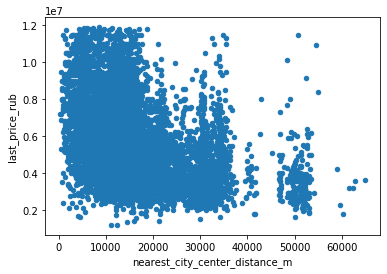

In [88]:
real_estate_df_normal.plot(x='nearest_city_center_distance_m', y='last_price_rub', kind='scatter')
plt.show()

In [89]:
real_estate_df_normal['nearest_city_center_distance_m'].corr(real_estate_df_normal['last_price_rub'])

-0.3179171016240468

**Вывод:** Корреляция средняя, видно, что квартиры ближе к центру стоят в среднем дороже.

<a name="exploratory_data_analysis.corr.floor"></a>
#### Этаж

<div class="alert alert-info">
    
Выведем график зависимости `floor_category` от `last_price_rub` 
    
</div>

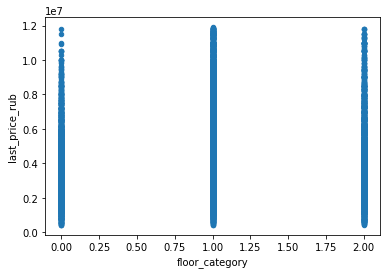

In [90]:
real_estate_df_normal.plot(x='floor_category', y='last_price_rub', kind='scatter')
plt.show()

In [91]:
real_estate_df_normal['floor_category'].corr(real_estate_df_normal['last_price_rub'])

0.04362039922770115

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Теперь все верно, только график стоило привести иной, например, по средним ценам. Твой же не дает нам информации для анализа. 

</div>

Построем сводную таблицу по `floor_type`

In [92]:
real_estate_df_normal.pivot_table(index='floor_category', values='last_price_rub')

,last_price_rub
floor_category,
0,3.880427e+06
1,4.837524e+06
2,4.278138e+06


**Вывод**: корреляция есть, хоть и слабая, на нижнем этаже квартиры самые дешевые, потом идет верхний этаж, а за ним все остальные.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Это что-то новое в исследовании. Ты изучаешь зависимость цены от квартир на первом этаже? Выше ты ведь не выделял комнаты и не изучал взаиомсвязь цены и квартир с 1 комнатой. Так вот и тут не надо. С помощью корреляций мы проверяем взаимосвязь полных данных.

</div>

<div class="alert alert-info">
Поправил
</div>

<a name="exploratory_data_analysis.corr.creation_date"></a>
#### Дата размещения

Построим матрицу корреляциии для столбцов `creation_date_day`, `creation_date_month`, `creation_date_year` и `last_price_rub`

In [93]:
real_estate_df_normal[['creation_date_day', 'creation_date_month', 'creation_date_year', 'last_price_rub']].corr()

,creation_date_day,creation_date_month,creation_date_year,last_price_rub
creation_date_day,1.000000,0.011512,0.000238,-0.006530
creation_date_month,0.011512,1.000000,-0.226496,0.006003
creation_date_year,0.000238,-0.226496,1.000000,0.007650
last_price_rub,-0.006530,0.006003,0.007650,1.000000


Видно, что только год имеет небольшое влияние. Построим сводные таблицы по стоимости квартир в разные года, месяцы и дни

In [94]:
for column_name in ('creation_date_year', 'creation_date_month', 'creation_date_day'):
    display(real_estate_df_normal.pivot_table(index=column_name, values='last_price_rub').sort_values('last_price_rub', ascending=False))

,last_price_rub
creation_date_year,
2019,4.923759e+06
2015,4.790412e+06
2016,4.635388e+06
2017,4.632862e+06
2018,4.612783e+06


,last_price_rub
creation_date_month,
4,4.741200e+06
11,4.727075e+06
9,4.711257e+06
8,4.685919e+06
5,4.664411e+06
2,4.656481e+06
10,4.635414e+06
1,4.627677e+06
7,4.603907e+06


,last_price_rub
creation_date_day,
3,4.682847e+06
1,4.669935e+06
4,4.659650e+06
0,4.643113e+06
2,4.624021e+06
6,4.588130e+06
5,4.583775e+06


<div class="alert alert-info">

Выведем по ним графики
    
</div>

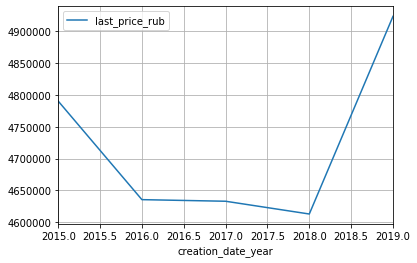

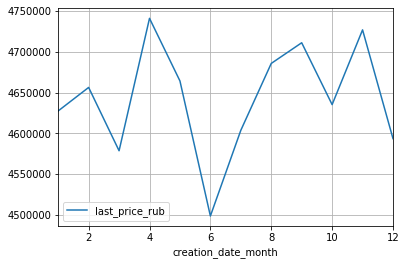

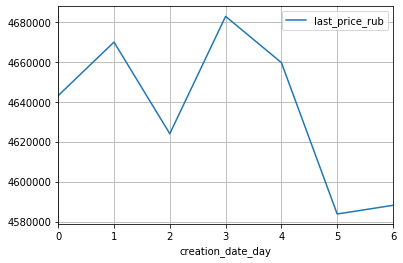

In [141]:
for column_name in ('creation_date_year', 'creation_date_month', 'creation_date_day'):
    real_estate_df_normal.pivot_table(index=column_name, values='last_price_rub').sort_values(column_name).plot(grid=True)

Есть предположение, что цены на недвижимость в разные года зависят от курса валюты.  
В 2015 году средняя цена была выше, в этот же год вырос курс рубля. 
Хотя под эту теорию не попадает 2019 год, возможно причины геополитические.

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Графики приведены. Согласись, анализировать инфомацию визуально куда лучше. 

</div>

**Выводы**: 
* небольшое влияние на цену иммет год - видимо это связано с состоянием экономики страны. Самые дорогие квартиры были в 2019 году, а дешевые - в 2018
* Месяц публикации почти не влияет на цену, чуть дороже стоят квартиры выставленные в апреле, а дешевле - в июне
* День влияет на цену еще меньше, самый выгодный день для создания объявления - это среда, а невыгодный - пятница
* Но стоит учитывать, что влияние даты несущественно и им можно принебречь

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Основные параметры, влияющие на цену, изучены. Приведены необходимые графики и значения корреляций. Здорово, что по каждому параметру приведен вывод о его влиянии на цену квартиры. Метод corr можно применять сразу ко всему датафрейму для получения матрицы корреляций, верно. Также для визуализации данной матрицы корреляций можно использовать метод heatmap из библиотеки seaborn. Будет здорово, если ты сможешь это реализовать. 
    
Исправь помарку выше пр расчетах корреляции. Также не хватает графиков по временным показателям. Зависимость может быть нелинейная, корреляция же этого не покажет. 

</div>

<a name="exploratory_data_analysis.localities"></a>
### Анализ населенных пунктов

Получим топ-10 населенных пунктов по количеству объявлений

In [95]:
top_localities = real_estate_df_normal['locality_name'].value_counts().head(10)
display(top_localities)

санкт-петербург      10746
поселок мурино         516
поселок шушары         384
всеволожск             302
поселок парголово      287
колпино                284
деревня кудрово        267
пушкин                 253
гатчина                239
выборг                 181
Name: locality_name, dtype: int64

Теперь выберем строки с населенными пунктами из `top_localities` и посчитаем по ним среднюю цену для каждого населенного пункта

In [96]:
real_estate_df_normal_locality_price = real_estate_df_normal.query('locality_name in @top_localities.index')\
    .pivot_table(index='locality_name', values='price_per_m2')\
    .sort_values('price_per_m2', ascending=False)
display(real_estate_df_normal_locality_price)

,price_per_m2
locality_name,
санкт-петербург,104247.984702
пушкин,99207.832596
деревня кудрово,92600.436714
поселок парголово,89336.954129
поселок мурино,85936.528290
поселок шушары,77912.459324
колпино,74589.439238
гатчина,68241.087819
всеволожск,66644.479441


<div class="alert alert-info">
    
Выведем график зависимости цены от местоположения 

</div>

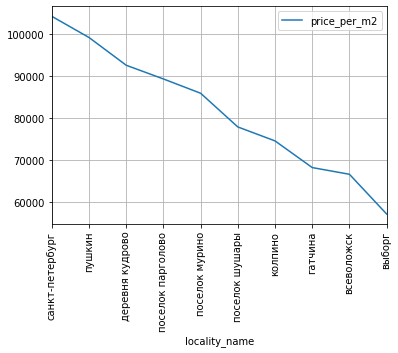

In [97]:
real_estate_df_normal_locality_price.plot(grid=True)
plt.xticks(rotation=90)
plt.show()

**Выводы**: 
* самый дорогой населенный пункт - это Санкт-Петербург
* самый дешевый - Выборг

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Результат по ценам в зависимости от местоположения квартир получен, можно привести график зависимости цены от местоположения.

</div>

<div class="alert alert-info">
    
Добавил

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Мы работаем с категориальными данными, поэтому стоило использовать диаграмму вместо линейного типа графика. 

</div>

<a name="exploratory_data_analysis.localities"></a>
### Зависимость цены от расстояния до центра

Сначала выделим квартиры в Санкт-Петербурге

In [98]:
real_estate_df_normal_piter = real_estate_df_normal[real_estate_df_normal['locality_name'] == 'санкт-петербург'].copy()
print(real_estate_df_normal_piter.shape[0])

10746


Теперь добавим расстояние до центра в километрах и округлим его

In [99]:
real_estate_df_normal_piter['nearest_city_center_distance_km'] = real_estate_df_normal_piter['nearest_city_center_distance_m'] / 1000
real_estate_df_normal_piter['nearest_city_center_distance_km'] = real_estate_df_normal_piter['nearest_city_center_distance_km'].round()
real_estate_df_normal_piter.head(5)

,images_count,last_price_rub,total_area_m2,creation_date,rooms_count,ceiling_height_m,floors_count,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony_count,locality_name,nearest_airport_distance_m,nearest_city_center_distance_m,parks_around_3000m_count,nearest_park_distance_m,ponds_around_3000m_count,nearest_pond_distance_m,days_exposition,city_center_category,living_to_total_area_ratio,kitchen_to_total_area_ratio,price_per_m2,creation_date_day,creation_date_month,creation_date_year,floor_category,nearest_city_center_distance_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,1,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,город,0.320000,0.410000,100000.000000,1,6,2018,1,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,город,0.714754,0.106557,88524.590164,6,2,2017,1,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,1,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,город,0.512626,0.214646,127525.252525,3,11,2017,1,14.0
15,16,4650000,39.0,2017-11-18,1,2.60,14,20.5,5,False,False,False,7.6,1,санкт-петербург,12900.0,14259.0,1,590.0,1,296.0,19.0,город,0.525641,0.194872,119230.769231,5,11,2017,1,14.0
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,1,санкт-петербург,22108.0,10698.0,3,420.0,0,NaN,397.0,город,0.678049,0.109756,81707.317073,3,11,2017,0,11.0


Посчитаем среднюю цену для каждого километра и построим по этим значениям график

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Импорт необходимых библиотек следует произволить в первой ячейке работы, как то рекомендует стандарт. 

</div>

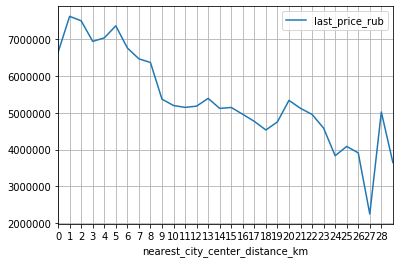

In [100]:
import numpy as np

real_estate_df_normal_piter_km_price = real_estate_df_normal_piter.pivot_table(index='nearest_city_center_distance_km', values='last_price_rub')
plot = real_estate_df_normal_piter_km_price.plot(
    grid=True, 
    xticks=np.arange(real_estate_df_normal_piter['nearest_city_center_distance_km'].max()),
)
plt.show()

Если посмотреть на график, то видно, что резкое падение цены случается на расстоянии 8 км, соответственно это и есть граница центра

**Вывод**: мы нашли, что граница центральной зоны - 8 км

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Да, именно эту границу мы можем назвать границей центральной части области. 

</div>

<a name="exploratory_data_analysis.center"></a>
### Анализ квартир в центре

Возьмем срез по квартирам, находящимся в центре

In [101]:
real_estate_df_normal_piter_center = real_estate_df_normal_piter[real_estate_df_normal_piter['nearest_city_center_distance_km'] <= 8]
print(real_estate_df_normal_piter_center.shape[0])

1735


<a name="exploratory_data_analysis.center.total_area_m2"></a>
#### Площадь

count    1735.000000
mean       60.421118
std        20.129131
min        12.000000
25%        44.500000
50%        58.500000
75%        74.400000
max       115.000000
Name: total_area_m2, dtype: float64

Границы нормальных значений для столбца total_area_m2: (12.00, 115.00)


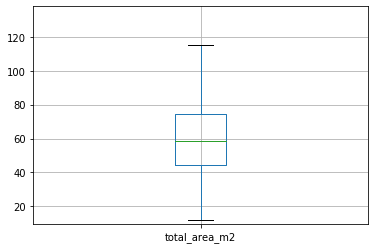

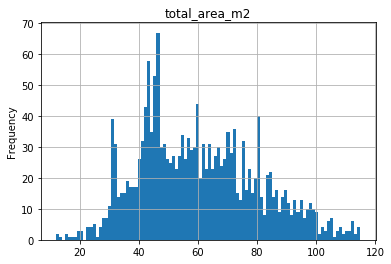

In [102]:
total_area_m2_analyzer = NormalRangeAnalyzer(real_estate_df_normal_piter_center['total_area_m2'], 'total_area_m2')
total_area_m2_analyzer.describe() 
total_area_m2_analyzer.boxplot() 
total_area_m2_analyzer.hist() 

**Вывод**: площадь квартир в центре похожа на площадь всех других квартир

<a name="exploratory_data_analysis.center.last_price_rub"></a>
#### Цена

count    1.735000e+03
mean     6.885738e+06
std      2.189932e+06
min      1.600000e+06
25%      5.200000e+06
50%      6.700000e+06
75%      8.500000e+06
max      1.189440e+07
Name: last_price_rub, dtype: float64

Границы нормальных значений для столбца last_price_rub: (1600000.00, 11894400.00)


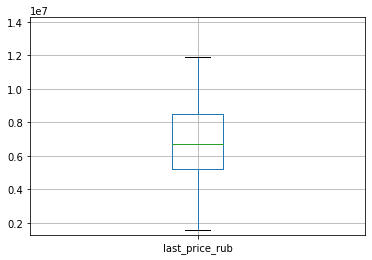

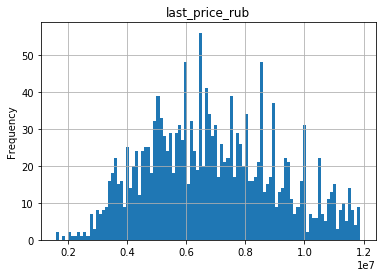

In [103]:
last_price_rub_analyzer = NormalRangeAnalyzer(real_estate_df_normal_piter_center['last_price_rub'], 'last_price_rub')
last_price_rub_analyzer.describe() 
last_price_rub_analyzer.boxplot() 
last_price_rub_analyzer.hist()

**Вывод**: цена квартиры в центре выше, особенно медианное

<a name="exploratory_data_analysis.center.rooms"></a>
#### Число комнат

count    1735.000000
mean        2.121614
std         0.912346
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms_count, dtype: float64

Границы нормальных значений для столбца rooms_count: (0.00, 6.00)


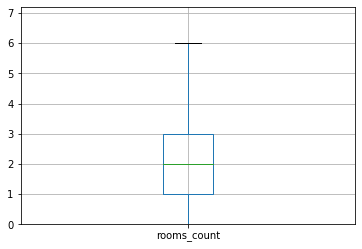

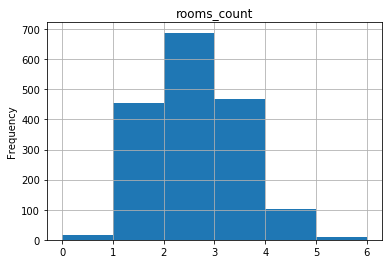

In [104]:
rooms_count_analyser = NormalRangeAnalyzer(real_estate_df_normal_piter_center['rooms_count'], 'rooms_count')
rooms_count_analyser.describe() 
rooms_count_analyser.boxplot()
rooms_count_analyser.hist(bins=6)

**Вывод**: Видно, что в центре меньшее сотношение однокомнатных квартир по сравнению со всеми квартирами

<a name="exploratory_data_analysis.center.ceiling_height_m"></a>
#### Высота потолков

count    1735.000000
mean        2.873222
std         0.183529
min         2.400000
25%         2.710000
50%         3.000000
75%         3.000000
max         3.100000
Name: ceiling_height_m, dtype: float64

Границы нормальных значений для столбца ceiling_height_m: (2.40, 3.10)


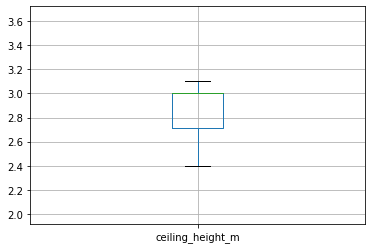

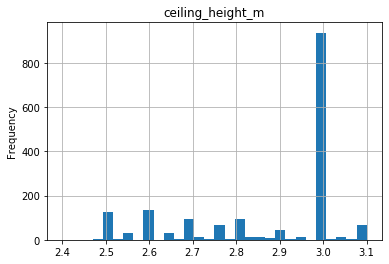

In [105]:
ceiling_height_m_analyser = NormalRangeAnalyzer(real_estate_df_normal_piter_center['ceiling_height_m'], 'ceiling_height_m')
ceiling_height_m_analyser.describe() 
ceiling_height_m_analyser.boxplot()
ceiling_height_m_analyser.hist(bins=30)

**Вывод**: В центре меньше квартир с низкими потолками

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

А вот и вся суть функций. Мы можем их использовать в последующем анализе. 

</div>

<a name="exploratory_data_analysis.center.corr"></a>
#### Выделение факторов, которые больше всего влияют на стоимость квартиры

Построим матрицу корреляциии для столбцов `total_area_m2`, `rooms_count`, `nearest_city_center_distance_m`, `creation_date_day`, `creation_date_month`, `creation_date_year` и `last_price_rub`

In [106]:
real_estate_df_normal_piter_center[[
    'last_price_rub',
    'total_area_m2',
    'rooms_count', 
    'nearest_city_center_distance_m', 
    'creation_date_day',
    'creation_date_month',
    'creation_date_year',
    'floor_category',
]].corr().sort_values('last_price_rub', ascending=False)

,last_price_rub,total_area_m2,rooms_count,nearest_city_center_distance_m,creation_date_day,creation_date_month,creation_date_year,floor_category
last_price_rub,1.000000,0.712398,0.440257,-0.151231,0.015409,-0.013958,-0.007009,0.137026
total_area_m2,0.712398,1.000000,0.799398,-0.189710,-0.006863,0.018613,-0.092739,0.117278
rooms_count,0.440257,0.799398,1.000000,-0.184033,-0.015626,0.023416,-0.060373,0.109679
floor_category,0.137026,0.117278,0.109679,-0.002101,0.014610,0.009318,0.025459,1.000000
creation_date_day,0.015409,-0.006863,-0.015626,0.024424,1.000000,0.053384,0.025262,0.014610
creation_date_year,-0.007009,-0.092739,-0.060373,0.069632,0.025262,-0.214805,1.000000,0.025459
creation_date_month,-0.013958,0.018613,0.023416,-0.040111,0.053384,1.000000,-0.214805,0.009318
nearest_city_center_distance_m,-0.151231,-0.189710,-0.184033,1.000000,0.024424,-0.040111,0.069632,-0.002101


Наблюдаем те же корреляции, что и для остальных квартир:
* сильно влияет размер квартиры 
* этаж также влияет на стоиомость - первый самый дешевый
* число комнат влияет не очень сильно 
* дата почти не влияет 

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Опять же, помимо корреляций, нам нужны графики зависимости цены от параметров.
    
Будет здорово, если ты построишь графики зависимости цены кв. метра от параметров квартиры для центра и для остальной части города на одном рисунке. Так различия в данных будет легче обнаружить. 

</div>

<div class="alert alert-info">

Выведем зависимости цены m<sup>2</sup> от основных параметров квартир в центре 
    
</div>

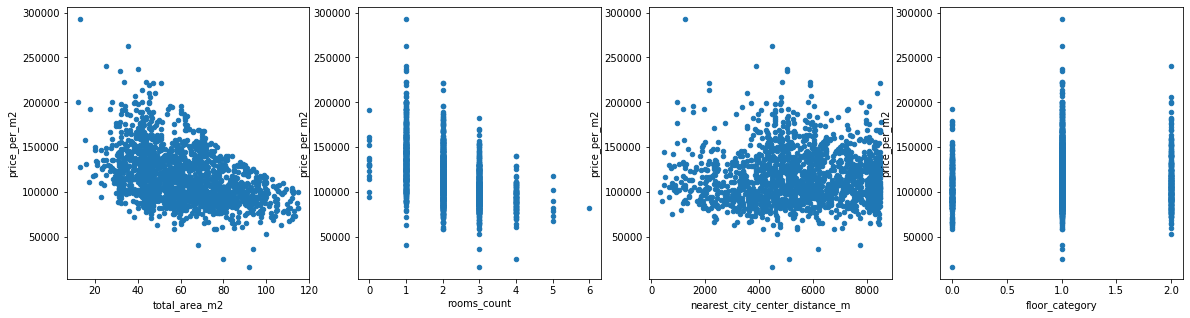

In [142]:
factors = ('total_area_m2', 'rooms_count', 'nearest_city_center_distance_m', 'floor_category')

fig, axes = plt.subplots(nrows=1, ncols=len(factors))

for idx, factor in enumerate(factors):
    real_estate_df_normal_piter_center.plot(x=factor, y='price_per_m2', kind='scatter', ax=axes[idx], figsize=(20,5))

plt.show()

Сравним их с квартирами со всего города

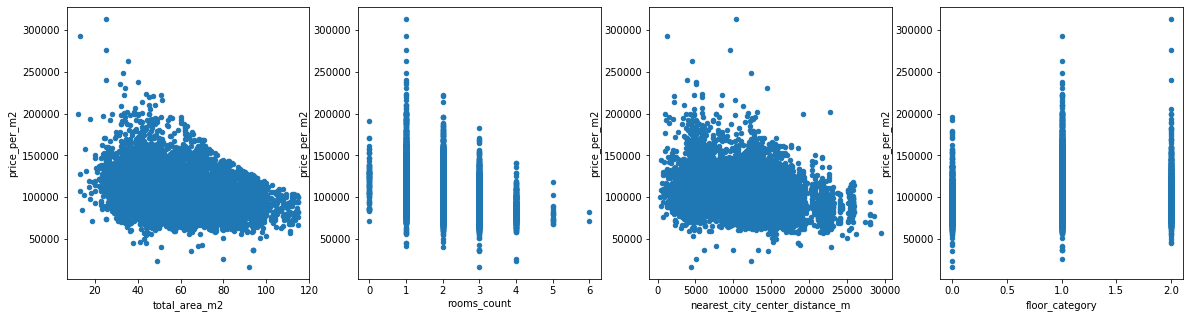

In [140]:
factors = ('total_area_m2', 'rooms_count', 'nearest_city_center_distance_m', 'floor_category')

fig, axes = plt.subplots(nrows=1, ncols=len(factors))

for idx, factor in enumerate(factors):
    real_estate_df_normal_piter.plot(x=factor, y='price_per_m2', kind='scatter', ax=axes[idx], figsize=(20,5))

plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Крутая реализация, молодец. Лучше все же построить графики на одном рисунке. Так сравнить показатели мы смогли бы качественнее.  

</div>

<a name="general_conclusion"></a>
## Шаг 5. Общий вывод

Была проведена работа по анализу рынка недвижимости Санкт-Петербурга.  
Сначала были обработаны дубликаты и пропуски в данных, типы данных были изменены на подходящие. 
После добавления необходимых данных в таблицу был произведен анализ данных: были обработаны основные параметры квартиры, найдены и отброшены выбросы.
Затем были решены 4 задачи: 
* Проведен анализ основных факторов, которые влияют на стоимость квартиры
* Найден топ населенных пунктов по цене на квартиры
* Проанализированно соотношение между ценой и удаленностью от центра 
* Для центрального района был заново произведен анализ факторов

Факторы, влияющие на стоимость:
* чем ближе к центру Санкт-Петербурга, тем дороже недвижимость
* потолки в центре выше
* первый и последний этажи дешевле, чем все остальные
* чем больше площадь квартиры, тем она дороже
* также стоимость квартиры повышает кол-во комнат, но площадь все равно отсается более важным фактором 

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод.     

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. 

Ты выполнил все пункты работы, молодец! Очень радует твой подход к анализу, особенно к автоматизации процессов. Теперь осталось подробнее поработать с разделом анализа зависимостей цены от параметров как для всех данных, так и для центра. Тогда получится очень достойная работа :)

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Помарки исправлены, анализ теперь сделан полностью, работа выполнена хорошо. Спасибо за обратную связь по помаркам. Успехов в дальнейших проектах :)

</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод